In [34]:
import pandas as pd
import numpy as np
from rso import rso_clustering
import matplotlib.pyplot as plt

In [2]:
print("Loading data...")
tf_idf = pd.read_csv('data/tfidf.csv')
print("Done.")

tf_idf = np.array(tf_idf)

Loading data...
Done.


In [3]:
def euc_distance(mp, mj):
    return np.linalg.norm(mp-mj)

def cos_distance(mp, mj):
    return np.dot(mp, mj)/(np.linalg.norm(mp)*np.linalg.norm(mj))

# print(euc_distance(tf_idf[0], tf_idf[1]))
# print(cos_distance(tf_idf[0], tf_idf[1]))

In [4]:
RSO_ITERATIONS = 40
n = tf_idf.shape[0]
k = 5

In [5]:
# kmeans = cluster.KMeans(n_clusters=3)
# kmeans = kmeans.fit(tf_idf)

In [33]:
# for k in [5,8,10]:
for k in [3,5,8,10]:

        population, best_rat, cluster_assignments, convergence = rso_clustering.rso_clustering(instances=tf_idf,
                agents=20,
                k=k,
                min_bound=np.zeros((k,n)),
                max_bound=np.ones((k,n)),
                distance=euc_distance,
                max_steps=RSO_ITERATIONS
        )

        with open("results/csv/best_rat.csv", "a+") as f:
                f.write(str(k) + ";")
                np.savetxt(f, best_rat, delimiter=";")

        # with open("cluster_assignments.csv", "a+") as f:
        #     f.write(str(k) + ";")
        #     np.savetxt(f, cluster_assignments, delimiter=";")

        with open("results/csv/convergence.csv", "a+") as f:
                f.write(str(k) + ";")
                np.savetxt(f, np.array(convergence).reshape((1,41)), delimiter=";")


100%|██████████| 40/40 [21:30<00:00, 32.25s/it]


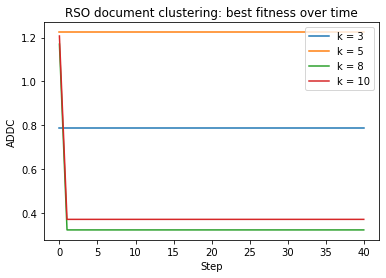

In [61]:
with open("results/csv/convergence.csv", "r") as f:
    legend = []
    for run in f.readlines():
        steps = run.strip().split(";")
        k = steps[0]
        steps = steps[1:]
        steps = [round(float(steps[i]), 3) for i in range(len(steps))]
        plt.plot(range(len(steps)), steps)
        legend.append("k = " + k)
        # ax = plt.gca()
        # ax.yaxis.set_major_formatter(FormatStrFormatter('%.10f'))
    
    plt.xlabel("Step")
    plt.ylabel("ADDC")
    plt.title("RSO document clustering: best fitness over time")
    plt.legend(legend)
    plt.savefig("results/plots/k_tests_rso.png")
    plt.show()